In [55]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [56]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'D2Coding'

In [57]:
yangChenData = pd.read_csv('양천구 전체 데이터(범주적용안함).csv')
gangNamData = pd.read_csv('강남구 전체 데이터(범주적용안함).csv')
gangDongData = pd.read_csv('강동구 전체 데이터(범주적용안함).csv')


In [58]:
yangChenData

날짜  평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  강수량(mm)  평균풍속(m/s)  \
0     2014-08-02     31.4     35.8     28.7       55.0      0.0        3.9   
1     2014-08-03     26.5     30.5     24.1       87.6     13.0        4.2   
2     2014-08-04     26.4     29.6     24.7       93.0      6.5        2.1   
3     2014-08-05     26.6     29.2     25.0       87.5      0.0        3.2   
4     2014-08-06     24.4     26.2     22.5       92.4     10.5        2.2   
...          ...      ...      ...      ...        ...      ...        ...   
3308  2023-12-27      1.5      6.8     -2.8       76.6      0.0        1.4   
3309  2023-12-28      1.2      4.4     -1.7       69.5      0.0        1.6   
3310  2023-12-29      1.3      4.6     -1.5       71.0      0.0        1.7   
3311  2023-12-30      0.6      2.1     -0.9       92.0     13.1        2.6   
3312  2023-12-31      2.1      4.3      0.6       95.5      4.7        2.0   

      최대풍속(m/s)  최대풍속풍향(deg)  PM10  PM2.5     오 존   이산화질소  일산화탄소   아황산가스  
0           6.3        110.0  11.0    8.0  0.0180  0.0150   0.20  0.0050  
1           7.0         70.0   9.0    5.0  0.0170  0.0140   0.20  0.0050  
2           4.7        230.0  10.0    8.0  0.0150  0.0210   0.30  0.0050  
3           4.8        230.0  47.0   29.0  0.0290  0.0180   0.40  0.0060  
4           4.9        230.0  37.0   23.0  0.0250  0.0310   0.40  0.0050  
...         ...          ...   ...    ...     ...     ...    ...     ...  
3308        3.0         50.0  89.0   70.0  0.0050  0.0652   1.14  0.0040  
3309        4.7        290.0  58.0   48.0  0.0084  0.0499   0.86  0.0038  
3310        3.3        270.0  44.0   34.0  0.0076  0.0468   0.78  0.0034  
3311        4.6         50.0  43.0   36.0  0.0054  0.0434   0.74  0.0027  
3312        5.0        320.0  27.0   22.0  0.0164  0.0315   0.73  0.0030  

[3313 rows x 15 columns]

In [59]:
totalData = pd.concat([yangChenData, gangNamData, gangDongData], ignore_index=True)
totalData

날짜  평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  강수량(mm)  평균풍속(m/s)  \
0     2014-08-02     31.4     35.8     28.7       55.0      0.0        3.9   
1     2014-08-03     26.5     30.5     24.1       87.6     13.0        4.2   
2     2014-08-04     26.4     29.6     24.7       93.0      6.5        2.1   
3     2014-08-05     26.6     29.2     25.0       87.5      0.0        3.2   
4     2014-08-06     24.4     26.2     22.5       92.4     10.5        2.2   
...          ...      ...      ...      ...        ...      ...        ...   
9946  2023-12-27      1.5      6.8     -2.8       76.6      0.0        1.4   
9947  2023-12-28      1.2      4.4     -1.7       69.5      0.0        1.6   
9948  2023-12-29      1.3      4.6     -1.5       71.0      0.0        1.7   
9949  2023-12-30      0.6      2.1     -0.9       92.0     13.1        2.6   
9950  2023-12-31      2.1      4.3      0.6       95.5      4.7        2.0   

      최대풍속(m/s)  최대풍속풍향(deg)  PM10  PM2.5     오 존   이산화질소  일산화탄소   아황산가스  
0           6.3        110.0  11.0    8.0  0.0180  0.0150   0.20  0.0050  
1           7.0         70.0   9.0    5.0  0.0170  0.0140   0.20  0.0050  
2           4.7        230.0  10.0    8.0  0.0150  0.0210   0.30  0.0050  
3           4.8        230.0  47.0   29.0  0.0290  0.0180   0.40  0.0060  
4           4.9        230.0  37.0   23.0  0.0250  0.0310   0.40  0.0050  
...         ...          ...   ...    ...     ...     ...    ...     ...  
9946        3.0         50.0  68.0   52.0  0.0075  0.0519   0.95  0.0028  
9947        4.7        290.0  49.0   40.0  0.0074  0.0466   0.90  0.0028  
9948        3.3        270.0  43.0   34.0  0.0079  0.0435   0.87  0.0024  
9949        4.6         50.0  42.0   37.0  0.0056  0.0403   0.84  0.0020  
9950        5.0        320.0  19.0   16.0  0.0130  0.0345   0.97  0.0020  

[9951 rows x 15 columns]

In [60]:
df_totalData = totalData.drop(columns=['날짜', 'PM10', 'PM2.5'])
df_totalData

평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  강수량(mm)  평균풍속(m/s)  최대풍속(m/s)  \
0        31.4     35.8     28.7       55.0      0.0        3.9        6.3   
1        26.5     30.5     24.1       87.6     13.0        4.2        7.0   
2        26.4     29.6     24.7       93.0      6.5        2.1        4.7   
3        26.6     29.2     25.0       87.5      0.0        3.2        4.8   
4        24.4     26.2     22.5       92.4     10.5        2.2        4.9   
...       ...      ...      ...        ...      ...        ...        ...   
9946      1.5      6.8     -2.8       76.6      0.0        1.4        3.0   
9947      1.2      4.4     -1.7       69.5      0.0        1.6        4.7   
9948      1.3      4.6     -1.5       71.0      0.0        1.7        3.3   
9949      0.6      2.1     -0.9       92.0     13.1        2.6        4.6   
9950      2.1      4.3      0.6       95.5      4.7        2.0        5.0   

      최대풍속풍향(deg)     오 존   이산화질소  일산화탄소   아황산가스  
0           110.0  0.0180  0.0150   0.20  0.0050  
1            70.0  0.0170  0.0140   0.20  0.0050  
2           230.0  0.0150  0.0210   0.30  0.0050  
3           230.0  0.0290  0.0180   0.40  0.0060  
4           230.0  0.0250  0.0310   0.40  0.0050  
...           ...     ...     ...    ...     ...  
9946         50.0  0.0075  0.0519   0.95  0.0028  
9947        290.0  0.0074  0.0466   0.90  0.0028  
9948        270.0  0.0079  0.0435   0.87  0.0024  
9949         50.0  0.0056  0.0403   0.84  0.0020  
9950        320.0  0.0130  0.0345   0.97  0.0020  

[9951 rows x 12 columns]

In [61]:
# 일산화탄소 모델
so_df = df_totalData.drop(columns=['오 존', '이산화질소', '일산화탄소'])
X = so_df.drop(['아황산가스'], axis=1)
y = so_df['아황산가스']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
# 모델
so_model = Sequential()
# 첫번째 은닉층
so_model.add(
    Dense(
        64, 
        activation='relu',
        input_shape=(X_train.shape[1], )
    )
)
# 중간 은닉층
so_model.add(
    Dense(
        64, 
        activation='relu'
    )
)
# 출력층
so_model.add(
    Dense(
        1 # 회귀분석의 경우 출력층의 activation 함수는 필요하지 않는다.
    )
)

In [63]:
# 모델
so_model = Sequential(
    [
        Dense(
            64, 
            activation='relu',
            input_shape=(X_train.shape[1], )
        ),
        Dense(
            64,
            activation='relu'
        ),
        Dense(
            1
        )
    ]
)

# 모델 설정
so_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

# 모델 요약 출력
so_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                576       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [64]:
import time
startTime = time.time()
history = so_model.fit(
    X_train, y_train, epochs=100, validation_split=0.2, verbose=1
)
print('학습시간 : {0:.3f}'.format(time.time() - startTime))

Epoch 1/100


150/150 [==============================] - 1s 4ms/step - loss: 0.0026 - mae: 0.0337 - val_loss: 6.4706e-04 - val_mae: 0.0193
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 4.5783e-04 - mae: 0.0162 - val_loss: 4.4761e-04 - val_mae: 0.0158
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 3.1267e-04 - mae: 0.0130 - val_loss: 3.0198e-04 - val_mae: 0.0132
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 1.9110e-04 - mae: 0.0104 - val_loss: 2.0364e-04 - val_mae: 0.0108
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 1.6082e-04 - mae: 0.0096 - val_loss: 1.5198e-04 - val_mae: 0.0090
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 1.5174e-04 - mae: 0.0092 - val_loss: 2.7501e-04 - val_mae: 0.0133
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 1.4749e-04 - mae: 0.0090 - val_loss: 1.3871e-04 - val_mae: 0.0092
Epoch 8/100
150/150 [========

In [65]:
# 모델 평가
test_loss, test_mae = so_model.evaluate(X_test, y_test)
print('MAE :', test_mae)

125/125 [==============================] - 0s 3ms/step - loss: 3.7189e-06 - mae: 0.0016
MAE : 0.001582951983436942


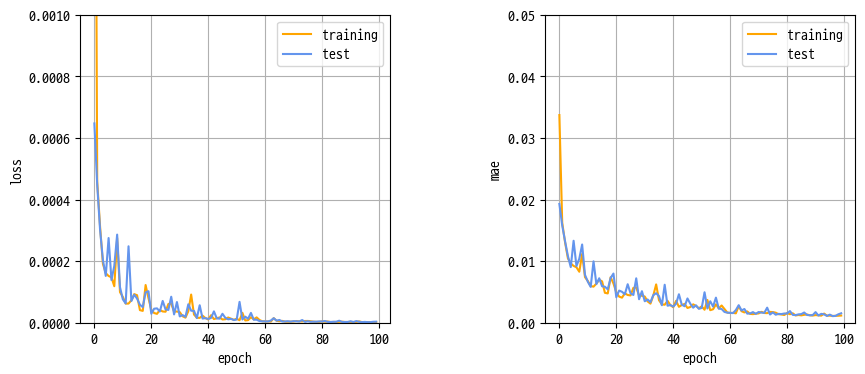

In [71]:
# 시각화
plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='orange')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 0.001)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='training', color='orange')
plt.plot(history.history['val_mae'], label='test', color='cornflowerblue')
plt.ylim(0, 0.05)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')

plt.show()

In [67]:
X_test[0]

array([-1.91581187, -2.00353161, -1.75771788, -0.61980164, -0.26485533,
        0.59485678,  1.10976677,  0.68122452])

In [68]:
pred1 = so_model.predict(X_test)
pred2 = pred1.reshape(-1,)
so_pred = round(pred2[0], 4)
print("so 예측값 :", so_pred)

125/125 [==============================] - 0s 1ms/step
so 예측값 : 0.0059
